<a href="https://colab.research.google.com/github/Jamyly-NMelo/Universo-Aluna-Fiap/blob/main/Potencializando_o_desempenho_com_NoSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as smp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [ ]:
vendas_2019 = pd.read_csv('/content/vendas_linha_petshop_2019.csv',
    sep = ';',
    encoding ='latin1',
    decimal =',')

In [ ]:
vendas_2020 = pd.read_csv('/content/vendas_linha_petshop_2020.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [ ]:
vendas_2021 = pd.read_csv('/content/vendas_linha_petshop_2021.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [ ]:
vendas_2022 = pd.read_csv('/content/vendas_linha_petshop_2022.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [ ]:
#Concatenar as 4 tabelas
vendas = pd.concat([vendas_2019, vendas_2020, vendas_2021, vendas_2022], ignore_index=True)
vendas

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22.00,2.0,44.00,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.60,Alimentação
1,2,Norte,Biscoito True Champion 300g,21.00,2.0,42.00,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.80,Alimentação
2,3,Norte,Biscoito True Champion 300g,22.00,NaN,44.00,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.20,Alimentação
3,4,Norte,Biscoito True Champion 300g,19.00,4.0,88.00,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.40,Alimentação
4,5,Norte,Biscoito True Champion 300g,22.00,2.0,44.00,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.60,Alimentação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157015,178938,Centro Oeste,Roupa para Cão Billaboard,61.56,NaN,61.56,11/02/2022,Goiás,Boleto Bancário,Grãos Blue,Maria Clara,1.32,24.20,Acessório
157016,178939,Centro Oeste,Roupa para Cão Billaboard,48.60,1.0,48.60,08/03/2022,Mato Grosso,Cartão Crédito,Grãos Blue,Andressa,0.99,18.15,Acessório
157017,178940,Centro Oeste,Roupa para Cão Billaboard,51.84,1.0,51.84,04/02/2022,Mato Grosso do Sul,Boleto Bancário,Grãos Blue,Ligia,1.68,23.10,Acessório
157018,178941,Centro Oeste,Roupa para Cão Billaboard,56.70,1.0,56.70,08/01/2022,Distrito Federal,Cartão Débito,Grãos Blue,Lucia,1.68,23.10,Acessório


In [ ]:
print(vendas.columns)


Index(['cod_pedido', 'regiao_pais', 'produto', 'valor', 'quantidade',
       'valor_total_bruto', 'data', 'estado', 'formapagto',
       'centro_distribuicao', 'responsavelpedido', 'valor_comissao',
       'lucro_liquido', 'categoriaprod'],
      dtype='object')


In [ ]:
vendas.columns = vendas.columns.str.strip()


# Calcula a média de preço da população para cada ano


In [ ]:
media_preco_populacao_2019 = vendas_2019['valor'].mean()
print(media_preco_populacao_2019)


87.63387228287891


In [ ]:
media_preco_populacao_2020 = vendas_2020['valor'].mean()
print(media_preco_populacao_2020)

97.91444100319028


In [ ]:
media_preco_populacao_2021 = vendas_2021['valor'].mean()
print(media_preco_populacao_2021)


117.06263526290537


In [ ]:
media_preco_populacao_2022 = vendas_2022['valor'].mean()
print(media_preco_populacao_2022)


141.3502979443602


In [ ]:
print(media_preco_populacao_2019)
print(media_preco_populacao_2020)
print(media_preco_populacao_2021)
print(media_preco_populacao_2022)

87.63387228287891
97.91444100319028
117.06263526290537
141.3502979443602


# Calcula a média de preço para cada região

In [ ]:
media_preco_regiao_2019 = vendas_2019.groupby('regiao_pais')['valor'].mean()
print(media_preco_regiao_2019)

regiao_pais
Centro Oeste    87.757116
Nordeste        87.534934
Norte           87.702111
Sudeste         87.691986
Sul             87.411540
Name: valor, dtype: float64


In [ ]:
media_preco_regiao_2020 = vendas_2020.groupby('regiao_pais')['valor'].mean()
print(media_preco_regiao_2020)

regiao_pais
Centro Oeste    97.946380
Nordeste        97.864075
Norte           97.983369
Sudeste         97.942950
Sul             97.764285
Name: valor, dtype: float64


In [ ]:
media_preco_regiao_2021 = vendas_2021.groupby('regiao_pais')['valor'].mean()
print(media_preco_regiao_2021)

regiao_pais
Centro Oeste    117.137380
Nordeste        117.162430
Norte           116.595505
Sudeste         117.495657
Sul             117.131357
Name: valor, dtype: float64


In [ ]:
media_preco_regiao_2022 = vendas_2022.groupby('regiao_pais')['valor'].mean()
print(media_preco_regiao_2022)

regiao_pais
Centro Oeste    141.638670
Nordes                 NaN
Nordeste        141.428571
Norte           141.460561
Sudeste         141.094571
Sul             140.977619
Name: valor, dtype: float64


In [ ]:

# Concatenar as tabelas
media_preco_regiao = pd.concat([media_preco_regiao_2019, media_preco_regiao_2020, media_preco_regiao_2021, media_preco_regiao_2022], axis=1)

# Renomear as colunas com os títulos correspondentes
media_preco_regiao.columns = ['valor_2019', 'valor_2020', 'valor_2021', 'valor_2022']

print(media_preco_regiao)


              valor_2019  valor_2020  valor_2021  valor_2022
regiao_pais                                                 
Centro Oeste   87.757116   97.946380  117.137380  141.638670
Nordeste       87.534934   97.864075  117.162430  141.428571
Norte          87.702111   97.983369  116.595505  141.460561
Sudeste        87.691986   97.942950  117.495657  141.094571
Sul            87.411540   97.764285  117.131357  140.977619
Nordes               NaN         NaN         NaN         NaN


#Média de preço de alguma modalidade de pagamento e à média da população

In [ ]:
vendas['data'] = pd.to_datetime(vendas['data'])

<ipython-input-20-7cc40f6ed5cf>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  vendas['data'] = pd.to_datetime(vendas['data'])


In [ ]:
vendas['ano'] = vendas['data'].dt.year

In [ ]:
media_preco_forma_pagamento = vendas.groupby(['ano', 'formapagto'])['valor'].mean()


In [ ]:
print(media_preco_forma_pagamento)


ano     formapagto     
2019.0  Boleto Bancário     87.761350
        Cartão Crédito      86.224092
        Cartão Débito       87.985218
        Dinheiro            88.803202
        Pix                 87.445296
2020.0  Boleto Bancário     98.862464
        Cartão Crédito      98.855476
        Cartão Débito       94.052285
        Dinheiro           100.287116
        Pix                 97.556841
2021.0  Boleto Bancário    115.626537
        Cartão Crédito     117.691638
        Cartão Débito      116.526580
        Dinheiro           117.257712
        Pix                118.182084
2022.0  Boleto Bancário    138.740451
        Cartão Crédito     145.887399
        Cartão Débito      137.608406
        Dinheiro           140.620028
        Pix                143.884487
Name: valor, dtype: float64


#Analise de modalidade de pagamento médio da população

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

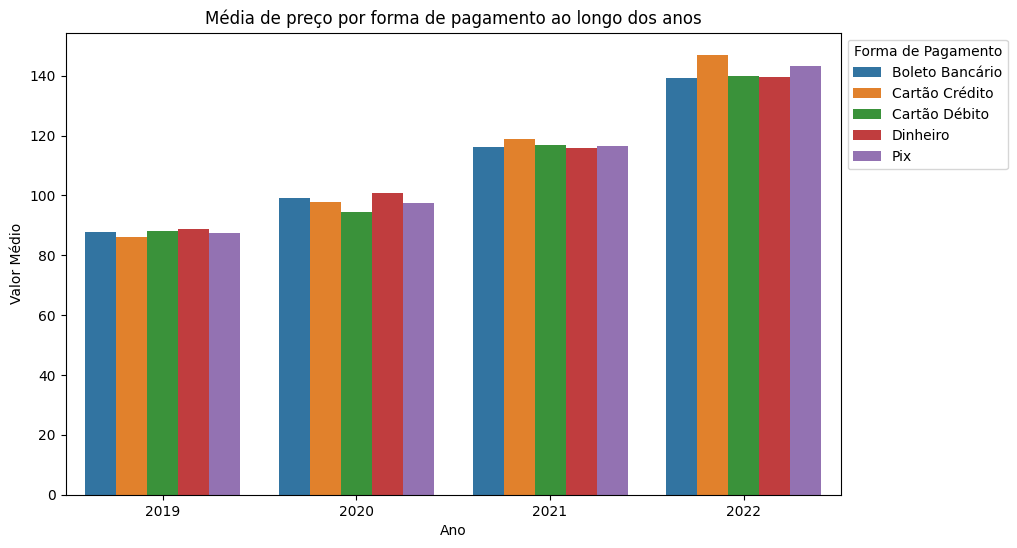

In [ ]:
# Dados fornecidos
anos_formapagto = {
    (2019, 'Boleto Bancário'): 87.761350,
    (2019, 'Cartão Crédito'): 86.224092,
    (2019, 'Cartão Débito'): 87.985218,
    (2019, 'Dinheiro'): 88.803202,
    (2019, 'Pix'): 87.445296,
    (2020, 'Boleto Bancário'): 99.249975,
    (2020, 'Cartão Crédito'): 97.923725,
    (2020, 'Cartão Débito'): 94.577728,
    (2020, 'Dinheiro'): 100.916170,
    (2020, 'Pix'): 97.364406,
    (2021, 'Boleto Bancário'): 116.066067,
    (2021, 'Cartão Crédito'): 118.734018,
    (2021, 'Cartão Débito'): 116.711709,
    (2021, 'Dinheiro'): 115.719205,
    (2021, 'Pix'): 116.545924,
    (2022, 'Boleto Bancário'): 139.421762,
    (2022, 'Cartão Crédito'): 147.046044,
    (2022, 'Cartão Débito'): 139.784489,
    (2022, 'Dinheiro'): 139.661669,
    (2022, 'Pix'): 143.368393
}

# Separando dados
anos = []
formas_pagto = []
valores = []

for (ano, forma_pagto), valor in anos_formapagto.items():
    anos.append(ano)
    formas_pagto.append(forma_pagto)
    valores.append(valor)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=anos, y=valores, hue=formas_pagto)
plt.xlabel('Ano')
plt.ylabel('Valor Médio')
plt.title('Média de preço por forma de pagamento ao longo dos anos')
plt.legend(title='Forma de Pagamento', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [ ]:
#Realiza o teste de hipóteses para comparar as médias de preço da população com as médias de preço das regiões e modalidades de pagamento


In [ ]:
populacao = {
    "Região": ["Sudeste", "Região Nordeste", "Região Sul", "Região Norte", "Região Centro-Oeste"],
    "População": [84847187, 54644582, 29933315, 17349619, 16287809]
}
populacao_df = pd.DataFrame(populacao)


In [ ]:
preco_metodo_pagamento_df = pd.DataFrame(list(anos_formapagto.items()), columns=['Ano_FormaPagamento', 'Preco'])

In [ ]:
vendas_populacao = vendas.merge(populacao_df, left_on='regiao_pais', right_on='Região')

In [ ]:
vendas_populacao['Preco_por_Habitante'] = vendas_populacao['valor_total_bruto'] / vendas_populacao['População']

In [ ]:
preco_metodo_pagamento_df['2019', '2020', '2021', '2022'] = preco_metodo_pagamento_df['Ano_FormaPagamento'].apply(lambda x: x[0])
preco_metodo_pagamento_df['FormaPagamento'] = preco_metodo_pagamento_df['Ano_FormaPagamento'].apply(lambda x: x[1])
preco_metodo_pagamento_com_populacao = preco_metodo_pagamento_df.merge(populacao_df, left_on='FormaPagamento', right_on='Região')
preco_metodo_pagamento_com_populacao['Preco_por_Habitante'] = preco_metodo_pagamento_com_populacao['Preco'] / preco_metodo_pagamento_com_populacao['População']

In [ ]:
print("Preço médio por habitante para cada região:")
print(vendas_populacao[['regiao_pais', 'Preco_por_Habitante']].groupby('regiao_pais').mean())

Preço médio por habitante para cada região:
             Preco_por_Habitante
regiao_pais                     
Sudeste                 0.000004


In [ ]:
print("\nPreço médio por habitante para cada método de pagamento:")
print(preco_metodo_pagamento_com_populacao[['FormaPagamento', 'Ano', 'Preco_por_Habitante']].groupby(['FormaPagamento', 'Ano']).mean())


Preço médio por habitante para cada método de pagamento:
Empty DataFrame
Columns: [Preco_por_Habitante]
Index: []
